In [ ]:
!pip install tabula-py

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.0/12.0 MB 22.6 MB/s eta 0:00:00


In [ ]:
!git clone https://github.com/madhoolikacvss/CSE151A_Project.git


Cloning into 'CSE151A_Project'...
remote: Enumerating objects: 54, done.
remote: Counting objects: 100% (54/54), done.
remote: Compressing objects: 100% (50/50), done.
remote: Total 54 (delta 19), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (54/54), 1.57 MiB | 5.02 MiB/s, done.
Resolving deltas: 100% (19/19), done.


In [ ]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
from tabula import read_pdf

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
!pip install pdfplumber
!pip install jpype1

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.0/42.0 kB 1.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.5/48.5 kB 1.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.2/59.2 kB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 28.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 29.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 488.6/488.6 kB 6.5 MB/s eta 0:00:00


In [ ]:
!cd CSE151A_Project && git pull

Already up to date.


In [ ]:
# CROP is data from 2000 to 2021
fdf = read_pdf("/content/CSE151A_Project/ZooDBCrop.pdf",pages = "all", lattice = True)
print("shape of fdf: ",len(fdf[0]))
for i in range(len(fdf)):
  print(len(fdf[i].columns))
  print(fdf[i].columns)

headers = ['Cruise', 'Ship', 'Date', 'Line', 'Station', 'Region', 'TowBegin', 'TowEnd', 'Latitude', 'Longitude', 'Abundance', 'Tows', 'Source']
cleaned_dfs = []
for df in fdf:
    df.columns = headers
    cleaned_dfs.append(df)
combined_df = pd.concat(cleaned_dfs, ignore_index=True)

shape of fdf:  25
13
Index(['Cruise', 'Ship', 'Date', 'Line', 'Station', 'Region', 'TowBegin',
       'TowEnd', 'Latitude', 'Longitude', 'Abundance', 'Tows', 'Source'],
      dtype='object')
13
Index(['CALCOFI 1404', 'N/A', '2014-\r04-07', 'N/A.1', 'N/A.2', 'SC', 'N/A.3',
       'N/A.4', 'N/A.5', 'N/A.6', '19,116.7', '10', 'Pooled'],
      dtype='object')


In [ ]:
# CROP2 is data from 1980 to 1999
fdf2 = read_pdf("/content/CSE151A_Project/ZooDBCrop2.pdf",pages = "all", lattice = True)
print("shape of fdf: ",len(fdf[0]))
for i in range(len(fdf2)):
  print(len(fdf2[i].columns))
  print(fdf2[i].columns)

headers = ['Cruise', 'Ship', 'Date', 'Line', 'Station', 'Region', 'TowBegin', 'TowEnd', 'Latitude', 'Longitude', 'Abundance', 'Tows', 'Source']
cleaned_dfs2 = []
for df in fdf2:
    df.columns = headers
    cleaned_dfs2.append(df)
combined_df2 = pd.concat(cleaned_dfs2, ignore_index=True)

shape of fdf:  25
13
Index(['Cruise', 'Ship', 'Date', 'Line', 'Station', 'Region', 'TowBegin',
       'TowEnd', 'Latitude', 'Longitude', 'Abundance', 'Tows', 'Source'],
      dtype='object')
13
Index(['CALCOFI 9304', 'N/A', '1993-04-\r05', 'N/A.1', 'N/A.2', 'SC', 'N/A.3',
       'N/A.4', 'N/A.5', 'N/A.6', '7,891.3', '10', 'Pooled'],
      dtype='object')


In [ ]:
dataset = pd.concat([combined_df, combined_df2], axis=0, ignore_index=True)
print("shape:",dataset.shape)

shape: (62, 13)


In [ ]:
# These columns all have N/A value. So we have to drop them.
dataset = dataset.drop(columns=['Tows','TowBegin', 'Ship', 'Source', 'Line',	'TowEnd', 'Longitude', 'Cruise', 'Station',	'Latitude'])
dataset = dataset.dropna()

In [ ]:
dataset

,Date,Region,Abundance
0,2000-\r04-13,SC,"30,910.5"
1,2001-\r04-13,SC,"25,181.6"
2,2002-\r04-03,SC,"34,504.3"
3,2003-\r04-10,SC,"71,990.2"
4,2003-\r04-22,CC,"7,878.5"
...,...,...,...
57,1990-04-\r23,SC,"10,784.0"
58,1992-04-\r21,SC,"5,464.0"
59,1994-03-\r29,SC,"9,820.2"
60,1996-04-\r22,SC,"25,972.5"


The data in the column Region is one of the two values 'SC' or 'CC'. It has no order so using One - Hot Encoding. We can use 1 for 'SC' and 0 for 'CC', but by doing this we are giving an order to these values where there is no true zero. That is why we are prefering One Hot Encoding as this data is nominal.

In [ ]:
#One Hot Encoding
dataset = pd.get_dummies(dataset, columns=['Region'])
dataset['Region'] = dataset['Region_SC']
dataset.drop(['Region_CC', 'Region_SC'], axis=1, inplace=True)
dataset['Region'] = dataset['Region'].astype(int)
dataset

,Date,Abundance,Region
0,2000-\r04-13,"30,910.5",1
1,2001-\r04-13,"25,181.6",1
2,2002-\r04-03,"34,504.3",1
3,2003-\r04-10,"71,990.2",1
4,2003-\r04-22,"7,878.5",0
...,...,...,...
57,1990-04-\r23,"10,784.0",1
58,1992-04-\r21,"5,464.0",1
59,1994-03-\r29,"9,820.2",1
60,1996-04-\r22,"25,972.5",1


In [ ]:
dataset['Year'] = dataset['Date'].str.extract(r'(\d{4})')
dataset.drop(columns=['Date'], inplace=True)
dataset

,Abundance,Region,Year
0,"30,910.5",1,2000
1,"25,181.6",1,2001
2,"34,504.3",1,2002
3,"71,990.2",1,2003
4,"7,878.5",0,2003
...,...,...,...
57,"10,784.0",1,1990
58,"5,464.0",1,1992
59,"9,820.2",1,1994
60,"25,972.5",1,1996


In [ ]:
dataset = dataset.sort_values(by='Year', ascending=True)
dataset.reset_index(drop=True, inplace=True)
dataset

,Abundance,Region,Year
0,"11,163.0",0,1980
1,"28,034.9",1,1981
2,"25,251.0",0,1981
3,"19,073.7",1,1982
4,"37,393.1",0,1982
...,...,...,...
57,"9,438.3",1,2017
58,"16,864.2",0,2017
59,"22,759.8",0,2018
60,"16,205.6",1,2018


In [ ]:
dataset.info()
dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Abundance  62 non-null     object
 1   Region     62 non-null     int64 
 2   Year       62 non-null     object
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


,Abundance,Region,Year
0,"11,163.0",0,1980
1,"28,034.9",1,1981
2,"25,251.0",0,1981
3,"19,073.7",1,1982
4,"37,393.1",0,1982
...,...,...,...
57,"9,438.3",1,2017
58,"16,864.2",0,2017
59,"22,759.8",0,2018
60,"16,205.6",1,2018


In [ ]:
dataset['Abundance'] = dataset['Abundance'].str.replace(',', '', regex=False)
dataset['Abundance'] = pd.to_numeric(dataset['Abundance'], errors='coerce')

In [ ]:
dataset

,Abundance,Region,Year
0,11163.0,0,1980
1,28034.9,1,1981
2,25251.0,0,1981
3,19073.7,1,1982
4,37393.1,0,1982
...,...,...,...
57,9438.3,1,2017
58,16864.2,0,2017
59,22759.8,0,2018
60,16205.6,1,2018


Normalizing the Abundance column with min max scaling

In [ ]:
#Min-Max Scaling of Abundance
min = dataset['Abundance'].min()
max = dataset['Abundance'].max()
dataset['Abundance'] = (dataset['Abundance']-min)/(max-min)
dataset.shape
dataset

,Abundance,Region,Year
0,0.077319,0,1980
1,0.306222,1,1981
2,0.268452,0,1981
3,0.184644,1,1982
4,0.433185,0,1982
...,...,...,...
57,0.053920,1,2017
58,0.154668,0,2017
59,0.234654,0,2018
60,0.145732,1,2018


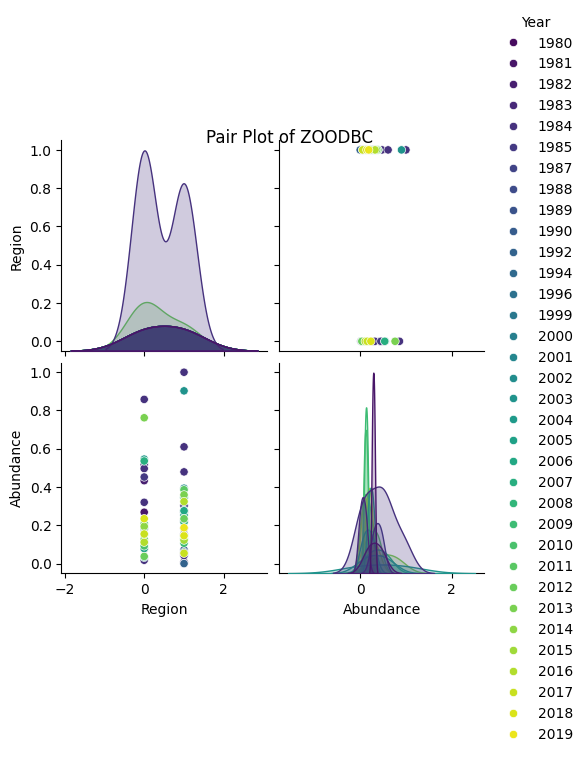

In [ ]:
#Pairplot
sns.pairplot(dataset, vars=["Region", "Abundance"], hue="Year", palette="viridis")
# Color coded by Date, can change to other column to observe chnages from different perspectives
plt.suptitle("Pair Plot of ZOODBC", y=1)
plt.show()

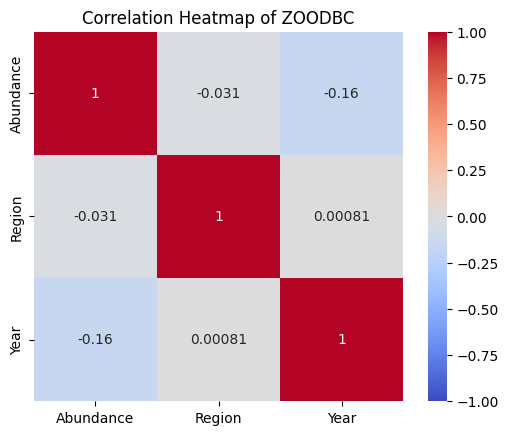

In [ ]:
matrix = dataset.corr()
sns.heatmap(matrix, annot=True, cmap="coolwarm", vmin=-1, vmax=1, square=True)
plt.title("Correlation Heatmap of ZOODBC")
plt.show()

#DATASET 2:

In [ ]:
!cd CSE151A_Project/ && ls


 BATS.csv		       LDL_2022.csv  'Meeting Log'   ZooDBCrop2.pdf
'CSE 151A ZooDB Results.csv'   LDL_2023.csv   README.md      ZooDBCrop.pdf
 LDL_2021.csv		       LDL_2024.csv   ZooDB-2.pdf    ZooDB.pdf


In [ ]:
# BATS(1)
dataset2 = pd.read_csv('/content/CSE151A_Project/BATS.csv')
print(dataset2.columns)

Index(['Station', ' Sample', '  Excel', 'Date', ' Depth', '   Salinity',
       '    Temp', ' d13C-DIC', '  DIC', '   ALK'],
      dtype='object')


In [ ]:
dataset2 = dataset2.drop(columns=['Station', '  Excel', 'Date',])

In [ ]:
dataset2

,Sample,Depth,Salinity,Temp,d13C-DIC,DIC,ALK
0,1989-01-29,18,36.645,20.79,1.48,2039.48,2395.04
1,1990-06-22,1,36.456,24.99,1.36,2031.94,2384.17
2,1990-06-22,10,36.467,24.33,1.4,2031.79,2378.03
3,1990-07-18,2,36.456,27.35,1.38,2030.62,2378.91
4,1990-07-18,10,36.454,27.25,1.39,2030.89,2377.16
...,...,...,...,...,...,...,...
467,2016-11-20,10,36.623,22.9508,0.771,2064.29,2390.76
468,2016-12-14,10,36.609,NaN,0.73,2070.26,2394.12
469,2017-01-07,10,36.623,NaN,0.719,2070.48,2393.59
470,2017-02-19,10,36.775,NaN,0.666,2083.82,2404.82


In [ ]:
print(dataset2.columns)

Index([' Sample', ' Depth', '   Salinity', '    Temp', ' d13C-DIC', '  DIC',
       '   ALK'],
      dtype='object')


In [ ]:
dataset2['Year'] = dataset2[' Sample'].str.extract(r'(\d{4})')
dataset2.drop(columns=[' Sample'], inplace=True)
dataset2.columns = dataset2.columns.str.strip()

In [ ]:
dataset2

,Depth,Salinity,Temp,d13C-DIC,DIC,ALK,Year
0,18,36.645,20.79,1.48,2039.48,2395.04,1989
1,1,36.456,24.99,1.36,2031.94,2384.17,1990
2,10,36.467,24.33,1.4,2031.79,2378.03,1990
3,2,36.456,27.35,1.38,2030.62,2378.91,1990
4,10,36.454,27.25,1.39,2030.89,2377.16,1990
...,...,...,...,...,...,...,...
467,10,36.623,22.9508,0.771,2064.29,2390.76,2016
468,10,36.609,NaN,0.73,2070.26,2394.12,2016
469,10,36.623,NaN,0.719,2070.48,2393.59,2017
470,10,36.775,NaN,0.666,2083.82,2404.82,2017


In [ ]:
print(dataset2.columns)

Index(['Depth', 'Salinity', 'Temp', 'd13C-DIC', 'DIC', 'ALK', 'Year'], dtype='object')


In [ ]:
# Convert the columns from string to numerical data
dataset2['Depth'] = pd.to_numeric(dataset2['Depth'], errors='coerce')
dataset2['Salinity'] = pd.to_numeric(dataset2['Salinity'], errors='coerce')
dataset2['Temp'] = pd.to_numeric(dataset2['Temp'], errors='coerce')
dataset2['d13C-DIC'] = pd.to_numeric(dataset2['d13C-DIC'], errors='coerce')
dataset2['DIC'] = pd.to_numeric(dataset2['DIC'], errors='coerce')
dataset2['ALK'] = pd.to_numeric(dataset2['ALK'], errors='coerce')
dataset2

,Depth,Salinity,Temp,d13C-DIC,DIC,ALK,Year
0,18,36.645,20.7900,1.480,2039.48,2395.04,1989
1,1,36.456,24.9900,1.360,2031.94,2384.17,1990
2,10,36.467,24.3300,1.400,2031.79,2378.03,1990
3,2,36.456,27.3500,1.380,2030.62,2378.91,1990
4,10,36.454,27.2500,1.390,2030.89,2377.16,1990
...,...,...,...,...,...,...,...
467,10,36.623,22.9508,0.771,2064.29,2390.76,2016
468,10,36.609,NaN,0.730,2070.26,2394.12,2016
469,10,36.623,NaN,0.719,2070.48,2393.59,2017
470,10,36.775,NaN,0.666,2083.82,2404.82,2017


In [ ]:
# Change the N/A values in each column to the mean of that column
# In total 144 rows have N/A values - which is 25% of that total rows
# Do we replace by the mean? It can cause the data to be inaccurate So just dropping for now.
dataset2 = dataset2.dropna()
dataset2


,Depth,Salinity,Temp,d13C-DIC,DIC,ALK,Year
0,18,36.645000,20.7900,1.480,2039.48,2395.040,1989
1,1,36.456000,24.9900,1.360,2031.94,2384.170,1990
2,10,36.467000,24.3300,1.400,2031.79,2378.030,1990
3,2,36.456000,27.3500,1.380,2030.62,2378.910,1990
4,10,36.454000,27.2500,1.390,2030.89,2377.160,1990
...,...,...,...,...,...,...,...
459,10,36.514700,25.1839,0.676,2068.96,2389.740,2016
460,10,36.477800,28.5679,0.699,2055.25,2385.005,2016
462,10,36.496342,29.3058,0.779,2047.31,2386.460,2016
463,10,36.689492,28.7737,0.802,2049.28,2396.275,2016


In [ ]:
# Min max scaling
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
columns_to_scale = dataset2.columns
columns_to_scale = columns_to_scale.drop('Year')
dataset2.loc[:,columns_to_scale] = scaler.fit_transform(dataset2[columns_to_scale])
dataset2

<ipython-input-31-a8d921cef2ec>:7: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[0.85 0.   0.45 0.05 0.45 0.   0.45 0.1  0.5  0.   0.5  0.05 0.5  0.05
 0.45 0.05 0.5  0.   0.4  0.05 0.5  0.15 0.45 0.   0.45 0.   0.4  0.
 0.45 0.05 0.45 0.   0.55 0.1  1.   0.   0.4  0.05 0.45 0.   0.5  0.1
 0.45 0.05 0.5  0.   0.4  0.05 0.4  0.   0.5  0.05 0.5  0.   0.45 0.
 0.5  0.   0.5  0.   0.5  0.15 0.4  0.2  0.5  0.15 0.5  0.   0.45 0.45
 0.05 0.05 0.5  0.45 0.05 0.05 0.5  0.05 0.45 0.05 0.45 0.   0.45 0.05
 0.5  0.05 0.5  0.   0.5  0.1  0.45 0.   0.45 0.   0.5  0.   0.5  0.1
 0.45 0.   0.5  0.1  0.45 0.1  0.45 0.1  0.5  0.05 0.45 0.   0.45 0.15
 0.5  0.05 0.45 0.1  0.05 0.5  0.1  0.5  0.05 0.45 0.15 0.45 0.   0.1
 0.4  0.15 0.45 0.05 0.5  0.1  0.45 0.1  0.45 0.1  0.45 0.1  0.45 0.05
 0.45 0.1  0.1  0.45 0.   0.45 0.15 0.45 0.   0.45 0.   0.45 0.   0.45
 0.   0.45 0.   0.45 0.   0.45 0.   0.45 0.   0.45 0.   0.45 0.   0.45
 0

,Depth,Salinity,Temp,d13C-DIC,DIC,ALK,Year
0,0.85,0.601504,0.177736,0.964029,0.424181,0.668835,1989
1,0.00,0.364662,0.570627,0.820144,0.339926,0.482800,1990
2,0.45,0.378446,0.508887,0.868106,0.338250,0.377717,1990
3,0.05,0.364662,0.791394,0.844125,0.325176,0.392778,1990
4,0.45,0.362155,0.782039,0.856115,0.328193,0.362827,1990
...,...,...,...,...,...,...,...
459,0.45,0.438221,0.588765,0.000000,0.753604,0.578128,2016
460,0.45,0.391980,0.905323,0.027578,0.600402,0.497091,2016
462,0.45,0.415215,0.974350,0.123501,0.511677,0.521992,2016
463,0.45,0.657258,0.924574,0.151079,0.533691,0.689971,2016


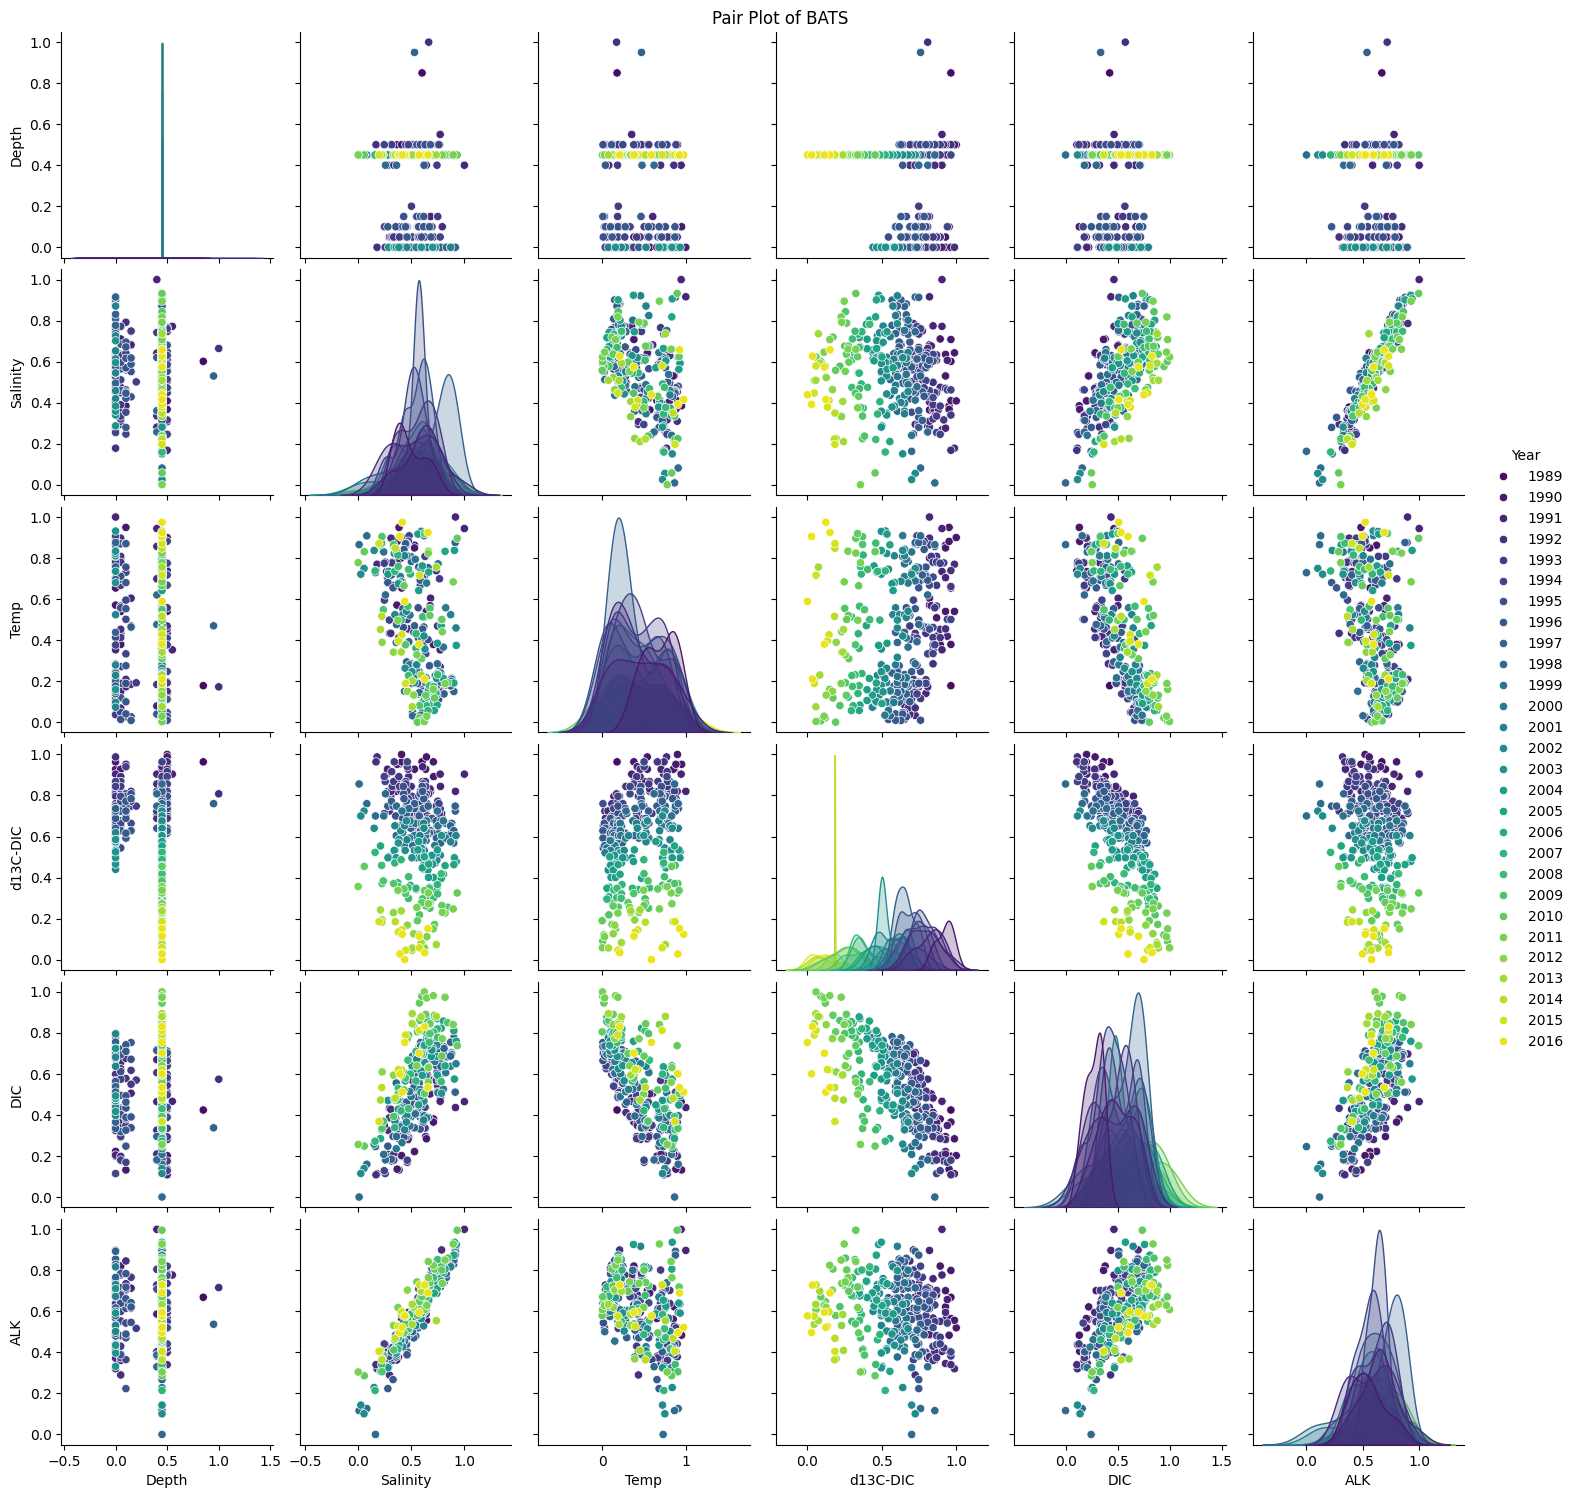

In [ ]:
#Pairplot
sns.pairplot(dataset2, vars=["Depth", "Salinity", "Temp", "d13C-DIC", "DIC", "ALK"], hue="Year", palette="viridis")
# Color coded by Year, can change to other column to observe chnages from different perspectives
plt.suptitle("Pair Plot of BATS", y=1)
plt.show()

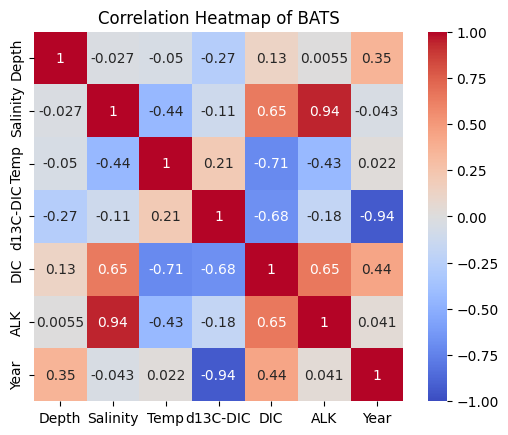

In [ ]:
#HeatMap
matrix = dataset2.corr()
sns.heatmap(matrix, annot=True, cmap="coolwarm", vmin=-1, vmax=1, square=True)
plt.title("Correlation Heatmap of BATS")
plt.show()

#Dataset 3:


In [ ]:
# Combining datasets from 2021,2022,2023,2024 into 1 dataset
dataset34 = pd.read_csv('/content/CSE151A_Project/LDL_2024.csv')
print(dataset34.shape)
dataset33 = pd.read_csv('/content/CSE151A_Project/LDL_2023.csv')
print(dataset33.shape)
dataset32 = pd.read_csv('/content/CSE151A_Project/LDL_2022.csv')
print(dataset32.shape)
dataset31 = pd.read_csv('/content/CSE151A_Project/LDL_2021.csv')
print(dataset31.shape)

dataset3 = pd.concat([dataset34,dataset33,dataset32,dataset31],ignore_index = True)
dataset3
dataset3.columns

(17902, 11)
(21434, 18)
(16005, 11)
(14877, 11)


Index(['platform_code', 'time', 'latitude', 'longitude', 'slp', 'drogue',
       'sst', 'battery', 'presdiff', 'salinity', 'gpsfixdel', 'windspd',
       'winddir', 'conductivity', 'avgwaveperiod', 'wvht', 'domwaveperiod',
       'domwavedir'],
      dtype='object')

In [ ]:
# Dropping columns that are empty and dropping rows that have N/A among them
dataset3 = dataset3.drop(columns=['platform_code','windspd','winddir','conductivity','wvht', 'domwaveperiod',
       'domwavedir','avgwaveperiod','gpsfixdel','salinity','drogue'])
dataset3 = dataset3.dropna()
dataset3

,time,latitude,longitude,slp,sst,battery,presdiff
0,UTC,degrees_north,degrees_east,hPa,deg C,volts,hPa
1,2024-10-27T00:00:00Z,29.376,-63.916,1019.3,27.36,10.4,0.9
2,2024-10-27T00:00:00Z,24.3046,-44.1372,1018.3,28.22,10.2,1.4
3,2024-10-27T00:00:00Z,26.075,-72.595,1019.5,28.12,10.4,0.8
4,2024-10-27T00:00:00Z,34.8858,-71.799,1020.1,26.91,10.2,0.3
...,...,...,...,...,...,...,...
70213,2021-11-29T12:00:00Z,16.1320277,-77.0399011,850.0,28.8,10.6,0.0
70214,2021-11-29T15:00:00Z,16.1029983,-77.0712178,850.0,28.86,10.8,0.0
70215,2021-11-29T18:00:00Z,16.0670861,-77.1067864,850.0,28.92,10.8,0.0
70216,2021-11-29T21:00:00Z,16.0243018,-77.1455412,850.0,28.9,10.8,0.0


In [ ]:
# Converting columns to numerical values and adding a column 'Year'
dataset3['latitude'] = pd.to_numeric(dataset3['latitude'], errors='coerce')
dataset3['longitude'] = pd.to_numeric(dataset3['longitude'], errors='coerce')
dataset3['slp'] = pd.to_numeric(dataset3['slp'], errors='coerce')
dataset3['sst'] = pd.to_numeric(dataset3['sst'], errors='coerce')
dataset3['battery'] = pd.to_numeric(dataset3['battery'], errors='coerce')
dataset3['presdiff'] = pd.to_numeric(dataset3['presdiff'], errors='coerce')

dataset3['Year'] = dataset3['time'].str.extract(r'(\d{4})')
dataset3.drop(columns=['time'], inplace=True)
dataset3


,latitude,longitude,slp,sst,battery,presdiff,Year
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,29.376000,-63.916000,1019.3,27.36,10.4,0.9,2024
2,24.304600,-44.137200,1018.3,28.22,10.2,1.4,2024
3,26.075000,-72.595000,1019.5,28.12,10.4,0.8,2024
4,34.885800,-71.799000,1020.1,26.91,10.2,0.3,2024
...,...,...,...,...,...,...,...
70213,16.132028,-77.039901,850.0,28.80,10.6,0.0,2021
70214,16.102998,-77.071218,850.0,28.86,10.8,0.0,2021
70215,16.067086,-77.106786,850.0,28.92,10.8,0.0,2021
70216,16.024302,-77.145541,850.0,28.90,10.8,0.0,2021


In [ ]:
# TO DO
# Filter the values in latitudes and longitudes according to the bounds for SC and CC by the region in Dataset 1 and assign binary encoding to these
sc_box = {
    'lat_min': 32.5,
    'lat_max': 34.5,
    'lon_min': -122.5,
    'lon_max': -119.0
}

cc_box = {
    'lat_min': 35.5,
    'lat_max': 38.5,
    'lon_min': -125.0,
    'lon_max': -122.0
}

sc_filter = (
    (dataset3['latitude'] >= sc_box['lat_min']) & (dataset3['latitude'] <= sc_box['lat_max']) &
    (dataset3['longitude'] >= sc_box['lon_min']) & (dataset3['longitude'] <= sc_box['lon_max'])
)
sc_df = dataset3[sc_filter]
sc_df['Region'] = 1 # Setting the region to 1 for Southern California

# Filter for Central California
cc_filter = (
    (dataset3['latitude'] >= cc_box['lat_min']) & (dataset3['latitude'] <= cc_box['lat_max']) &
    (dataset3['longitude'] >= cc_box['lon_min']) & (dataset3['longitude'] <= cc_box['lon_max'])
)
cc_df = dataset3[cc_filter]
cc_df['Region'] = 0  # Setting the region to 0 for Central california

dataset_filtered = pd.concat([sc_df,cc_df],ignore_index=True)

dataset3

,latitude,longitude,slp,sst,battery,presdiff,Year
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,29.376000,-63.916000,1019.3,27.36,10.4,0.9,2024
2,24.304600,-44.137200,1018.3,28.22,10.2,1.4,2024
3,26.075000,-72.595000,1019.5,28.12,10.4,0.8,2024
4,34.885800,-71.799000,1020.1,26.91,10.2,0.3,2024
...,...,...,...,...,...,...,...
70213,16.132028,-77.039901,850.0,28.80,10.6,0.0,2021
70214,16.102998,-77.071218,850.0,28.86,10.8,0.0,2021
70215,16.067086,-77.106786,850.0,28.92,10.8,0.0,2021
70216,16.024302,-77.145541,850.0,28.90,10.8,0.0,2021


In [ ]:
# Min Max Scaling
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
columns_to_scale = dataset3.columns
columns_to_scale = columns_to_scale.drop(['Year','latitude','longitude'])
dataset3.loc[:,columns_to_scale] = scaler.fit_transform(dataset3[columns_to_scale])
dataset3

,latitude,longitude,slp,sst,battery,presdiff,Year
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,29.376000,-63.916000,0.900532,0.790425,0.54,0.308989,2024
2,24.304600,-44.137200,0.895213,0.811431,0.52,0.323034,2024
3,26.075000,-72.595000,0.901596,0.808989,0.54,0.306180,2024
4,34.885800,-71.799000,0.904787,0.779433,0.52,0.292135,2024
...,...,...,...,...,...,...,...
70213,16.132028,-77.039901,0.000000,0.825598,0.56,0.283708,2021
70214,16.102998,-77.071218,0.000000,0.827064,0.58,0.283708,2021
70215,16.067086,-77.106786,0.000000,0.828530,0.58,0.283708,2021
70216,16.024302,-77.145541,0.000000,0.828041,0.58,0.283708,2021


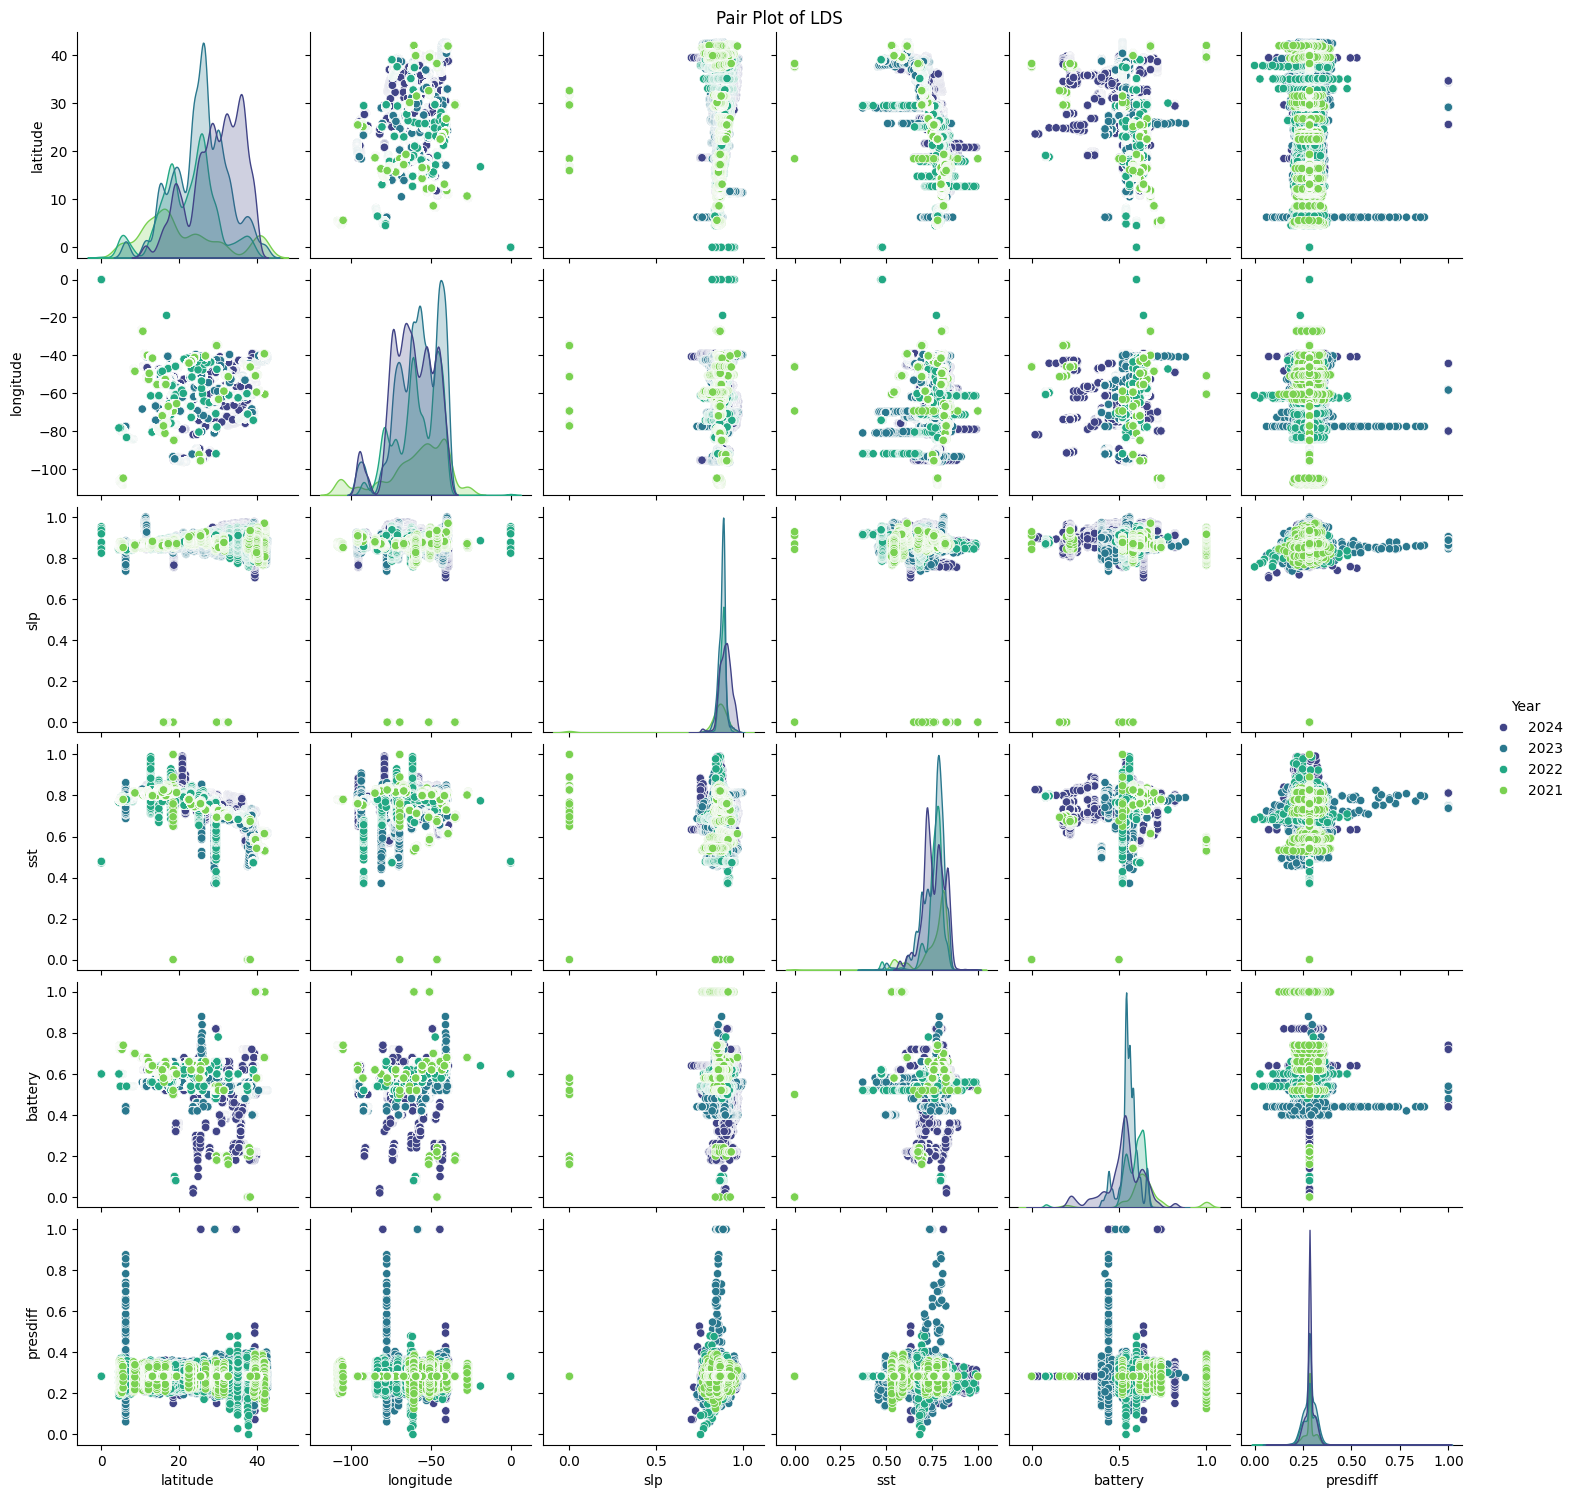

In [ ]:
#Pairplot
sns.pairplot(dataset3, vars=["latitude", "longitude", "slp", "sst", "battery", "presdiff"], hue="Year", palette="viridis")
# Color coded by Year, can change to other column to observe chnages from different perspectives
plt.suptitle("Pair Plot of LDS", y=1)
plt.show()

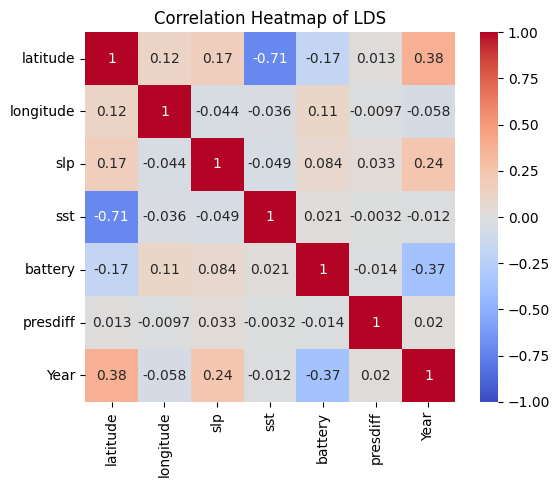

In [ ]:
#HeatMap
matrix = dataset3.corr()
sns.heatmap(matrix, annot=True, cmap="coolwarm", vmin=-1, vmax=1, square=True)
plt.title("Correlation Heatmap of LDS")
plt.show()